1. Carga de librerías
----

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

2. Carga de datos
----

A continuación, vamos a realizar uno de los retos lanzados por la compañía de Uber en kaggle. El obetivo del reto es uexplorar como las masivas operaciones diarias de Uber requieren una predicción precisa de tarifas para lograr estrategias comerciales óptimas.
* `key`: Identificador único de viaje.
* `fare_amount`: Costo del viaje (en USD).
* `pickup_datetime`: marca de tiempo del inicio del viaje.
* `Passenger_count`: Número de pasajeros.
* `pickup_longitude` y `pickup_latitude`: coordenadas iniciales de recogida.
* `dropoff_longitude` y `dropoff_latitude`: coordenadas de entrega.

In [3]:
# Guardamos el csv, lo transformamos a DataFrame
df = pd.read_csv("uber.csv")
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,52:06.0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,04:56.0,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,45:00.0,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,22:21.0,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,47:00.0,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


Podemos observar que la primera columna "unnammed" no aparece en el datasheet así que no es necesaria


In [4]:
# Eliminamos la variable Unnamed: 0 ya no nos sirve de nada

df = (df.drop(df.columns[0], axis = 1))

# df.drop(): Es un método de pandas que se utiliza para eliminar filas o columnas de un DataFrame.
# df.columns[0]: Hace referencia a la primera columna del DataFrame.
# axis=1: Significa que se eliminará una columna. En pandas:
# axis=0 se refiere a las filas.
# axis=1 se refiere a las columnas.

In [5]:
df


,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,52:06.0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,04:56.0,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,45:00.0,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,22:21.0,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,47:00.0,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...
199995,49:00.0,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,09:00.0,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,42:00.0,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,56:25.0,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695416,1


In [6]:
# Antes de continuar, tenemos que observar que tipo de datos es cada columna

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   key                200000 non-null  object 
 1   fare_amount        200000 non-null  float64
 2   pickup_datetime    200000 non-null  object 
 3   pickup_longitude   200000 non-null  float64
 4   pickup_latitude    200000 non-null  float64
 5   dropoff_longitude  199999 non-null  float64
 6   dropoff_latitude   199999 non-null  float64
 7   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 12.2+ MB


3. Limpieza de datos
----

3.1 Cambiar formato de la variable

In [7]:
# Si nos fijamos, la columna "pickup_datetime" se trata de un objeto, en lugar de un datetime
# esto se debe a que tiene incluida la información del uso horario "UTC", lo cual lo convierte
# en un string

# Se podría hacer la forma (no lo vamos a hacer)
# df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

3.2 Cambiar el nombre de las variables

In [8]:
# prompt: traducir nombre columnas mediante df.colums = []

df.columns = ['Id', 'precio', 'fecha', 'recogida_longitud', 'recogida_latitud', 'dejada_longitud', 'dejada_latitud', 'pasajeros']


Comprobamos que hasta ahora, los valores son normales (no anómalos)

In [9]:
df.describe()

,precio,recogida_longitud,recogida_latitud,dejada_longitud,dejada_latitud,pasajeros
count,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,12.500000,-73.967153,40.767158,-73.963659,40.768001,2.000000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


Podemos observar que el precio es negativo, pero preguntando al cliente, nos enteramos que se trata de las devoluciones.

Eso sí, no tiene sentido que haya más de 200 pasajeros en un sólo viaje, ni tampoco 0 (aunque puede tratarse de la devolución).

Por último, podemos observar que dejada_longitud y dejada_longitud tienen una unidad menor de cantidad de valores que el resto, esto veremos en el siguiente paso por qué.

3.3 Mirar valores NaN

In [10]:
# Primera pregunta: ¿tiene sentido que haya valores nulos?
# En este caso, el cliente nos dice que no.

# Comprobamos si hay algún valor NaN
df.isna().sum()

Id                   0
precio               0
fecha                0
recogida_longitud    0
recogida_latitud     0
dejada_longitud      1
dejada_latitud       1
pasajeros            0
dtype: int64

In [11]:
# Si es afirmativo (lo es), podemos averiguar que filas tienen NaN con el código:
df[df.isna().any(axis=1)]

# Se puede hacer la criba por columnas

,Id,precio,fecha,recogida_longitud,recogida_latitud,dejada_longitud,dejada_latitud,pasajeros
87946,51:57.0,24.1,2013-07-02 03:51:57 UTC,-73.950581,40.779692,NaN,NaN,0


In [12]:
# Eliminamos todas las filas con NaNs y re-asignamos los índices
df = df.dropna(axis=0).reset_index(drop=True)
df.isna().sum()

Id                   0
precio               0
fecha                0
recogida_longitud    0
recogida_latitud     0
dejada_longitud      0
dejada_latitud       0
pasajeros            0
dtype: int64

In [13]:
# Comprobamos que todo sigue bien
df

,Id,precio,fecha,recogida_longitud,recogida_latitud,dejada_longitud,dejada_latitud,pasajeros
0,52:06.0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,04:56.0,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,45:00.0,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,22:21.0,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,47:00.0,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...
199994,49:00.0,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199995,09:00.0,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199996,42:00.0,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199997,56:25.0,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695416,1


3.4 Miramos las filas duplicadas

In [14]:
# Miramos las filas duplicadas sin tener en cuenta el ID ya que siempre es único
df_sin_id = df.drop(["Id"], axis=1)
df_sin_id[df_sin_id.duplicated()==True]


,precio,fecha,recogida_longitud,recogida_latitud,dejada_longitud,dejada_latitud,pasajeros


No hay ninguna duplicada así que nada

In [15]:
# Si hubiera que eliminar duplicadas, utilizaríamos:
# (
#    datos
#    .drop_duplicates()
#    .reset_index(drop=True)
# )

3.3 Eliminar filas con instancias erroneas

In [16]:
df

,Id,precio,fecha,recogida_longitud,recogida_latitud,dejada_longitud,dejada_latitud,pasajeros
0,52:06.0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,04:56.0,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,45:00.0,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,22:21.0,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,47:00.0,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...
199994,49:00.0,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199995,09:00.0,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199996,42:00.0,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199997,56:25.0,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695416,1


In [19]:
# Miramos en internet las coordenadas reales de la ciudad de Nueva York
min_longitude, max_longitude = -74.25559, -73.70001
min_latitude, max_latitude = 40.49612, 40.91553

df = df[
    (df['recogida_longitud'] >= min_longitude) &
    (df['recogida_longitud'] <= max_longitude) &
    (df['recogida_latitud'] >= min_latitude) &
    (df['recogida_latitud'] <= max_latitude) &
    (df['dejada_longitud'] >= min_longitude) &
    (df['dejada_longitud'] <= max_longitude) &
    (df['dejada_latitud'] >= min_latitude) &
    (df['dejada_latitud'] <= max_latitude)
]


Por un lado, vamos a verificar que las coordenadas tanto de recogida como de dejada esten dentro de las coordenadas de New York. Por otro lado, vamos a verificar que la cantidad de pasajeros es el correcto.Además, vamos a verifiar que los precios son positivos, y los que sean negativos, mirar que ha sucedido. Las instancias que no cumplas dichas condiciones, seran eliminadas del conjunto de datos.

In [20]:
# Comprobar que la cantidad de pasajeros es el correcto
df = df[(df["pasajeros"]>0) & (df["pasajeros"] <= 6)].reset_index(drop=True)
df.shape

(194836, 8)

In [21]:
# Comprobar que los precios son positivos y si son negativos, mirar que ha sucedido
sum(df["precio"] <= 0)

18

In [22]:
# Hay instancias con precios negativos o de precio 0
# Vamos a poner todos losp recios a valor absoluto y borrar el ID y mirar si en ese caso hay 
# filas duplicadas, eso significaría que ha habido devoluciones

df_precios = (
    df
    .assign(
        # asigna a precio que cada valor de su columna opere el absoluto
        precio = lambda x: abs(x["precio"])
    )
    .drop(["Id"], axis = 1)
)


In [23]:
# Vemos que no son viajes cancelados, simplemente se han guardado mal
df_duplicados = df_precios[df_precios.duplicated()]
len(df_duplicados)

# duplicated compara cada fila con todas las anteriores en el dataframe
# pero solo marca un TRUE si todas las columnas son iguales

0

In [24]:
# Eliminamos todas las instancias con un valor en el precio inferior o igual a 0
# ya que no son necesarios para predecir futuros valores de precios

df = df[df["precio"] > 0].reset_index(drop = True)

# .head() es un método aplicado a un DataFrame de pandas, y devuelve
# las primeras filas del DataFrame
df.head()

,Id,precio,fecha,recogida_longitud,recogida_latitud,dejada_longitud,dejada_latitud,pasajeros
0,52:06.0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,04:56.0,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,45:00.0,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,22:21.0,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,47:00.0,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


3.5 Creación de nuevas variables

In [25]:
# Está bien dedicar un tiempo para decidir que variables se necesitan
# en función del objetivo principal de predicción. 
# Es muy imporante la comunicación con el cliente. 

Vamos a desglosar la variable time y además vamor a crear varias funciones para aplicar a nuestro dataframe.
1. Extraer de la variable `fecha` la hora, día, mes, día de la semana, si es findesemana y si esta en las horas puntas.
2. Una vez aplicada la función anterior a las coordeanas de recogida y dejada, calcular cual es la distancía entre las dos ubicaciones.
    <br>
    ```python
    from geopy.distance import geodesic
3. Una función que haga la conversión de USD a €.


In [26]:
# Extraer la variable de la fecha para conocer las horas puntas
df['fecha'] = pd.to_datetime(df['fecha'])

df['año'] = df['fecha'].dt.year
df['hora'] = df['fecha'].dt.hour
df['dia'] = df['fecha'].dt.day
df['mes'] = df['fecha'].dt.month
df['semana'] = df['fecha'].dt.dayofweek
df['es_finde'] = df['semana'].apply(lambda x: 1 if x > 4 else 0)
df['es_hora_punta'] = df['hora'].apply(lambda x: 1 if x in [7,8,9,16,17,18] else 0)

# Elimino la columna fecha del conjunto de datos al ser redundante
df = df.drop(["fecha"],axis=1)


In [27]:
# Una vez aplicada la función anterior, la coordenadas de recogida y dejada nos dará 
# la distancia entre las dos ubicaciones

from geopy.distance import geodesic

# Calculamos la distancia entre las dos coordenadas en kilometros
df["distancia_km"] = (
    df
    .apply(
        lambda x : geodesic((x["recogida_latitud"] , x["recogida_longitud"])   , (x["dejada_latitud"] , x["dejada_longitud"]) ).kilometers,
        axis=1

    )
)

In [28]:
# Creamos la función de pasar de USD a €. 1 dolar estadounidense son 0,93 euros.
def conversion_dolar_euro(precio):
    return round((precio * 0.93) / 1 ,2)

df["precio"] = (
    df
    .apply(
        lambda x: conversion_dolar_euro(x["precio"]),
        axis=1
    )
)

# Ponemos la variable precio en la última posición
columnas = ['Id', 'recogida_longitud', 'recogida_latitud','dejada_longitud', 'dejada_latitud', 'pasajeros',"año",
            'hora', 'dia', 'mes','semana', 'es_finde', 'es_hora_punta', 'distancia_km','precio']

df = df.loc[:,columnas]

In [29]:
# Comprobamos
df.head()

,Id,recogida_longitud,recogida_latitud,dejada_longitud,dejada_latitud,pasajeros,año,hora,dia,mes,semana,es_finde,es_hora_punta,distancia_km,precio
0,52:06.0,-73.999817,40.738354,-73.999512,40.723217,1,2015,19,7,5,3,0,0,1.681111,6.98
1,04:56.0,-73.994355,40.728225,-73.994710,40.750325,1,2009,20,17,7,4,0,0,2.454363,7.16
2,45:00.0,-74.005043,40.740770,-73.962565,40.772647,1,2009,21,24,8,0,0,0,5.039603,12.00
3,22:21.0,-73.976124,40.790844,-73.965316,40.803349,3,2009,8,26,6,4,0,1,1.661442,4.93
4,47:00.0,-73.925023,40.744085,-73.973082,40.761247,5,2014,17,28,8,3,0,1,4.483730,14.88


3.6 Correlación entre las variables

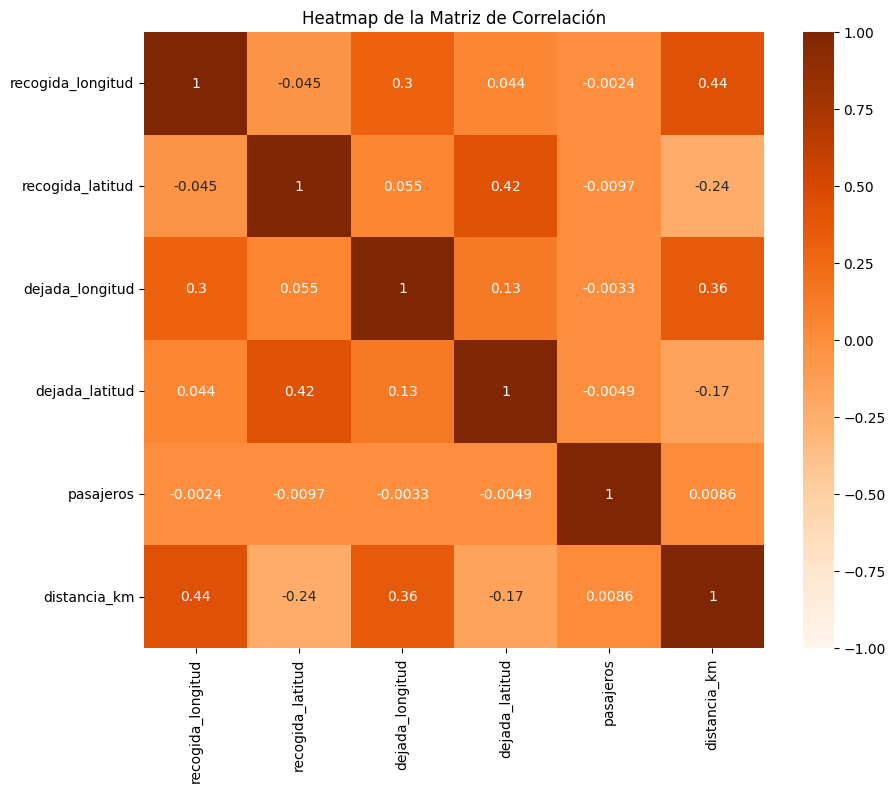

In [30]:
# Vamos a estudiar la correlación entre las variables por si alguna es redundante

selected_columns = ['recogida_longitud', 'recogida_latitud', 'dejada_longitud',
       'dejada_latitud', 'pasajeros', 'distancia_km']
matrix_corr = df.loc[:,selected_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(matrix_corr , annot=True,cmap="Oranges" , vmax=1.0 , vmin=-1.0)
plt.title('Heatmap de la Matriz de Correlación')
plt.show()

In [31]:
df.head()

,Id,recogida_longitud,recogida_latitud,dejada_longitud,dejada_latitud,pasajeros,año,hora,dia,mes,semana,es_finde,es_hora_punta,distancia_km,precio
0,52:06.0,-73.999817,40.738354,-73.999512,40.723217,1,2015,19,7,5,3,0,0,1.681111,6.98
1,04:56.0,-73.994355,40.728225,-73.994710,40.750325,1,2009,20,17,7,4,0,0,2.454363,7.16
2,45:00.0,-74.005043,40.740770,-73.962565,40.772647,1,2009,21,24,8,0,0,0,5.039603,12.00
3,22:21.0,-73.976124,40.790844,-73.965316,40.803349,3,2009,8,26,6,4,0,1,1.661442,4.93
4,47:00.0,-73.925023,40.744085,-73.973082,40.761247,5,2014,17,28,8,3,0,1,4.483730,14.88


4. Visualización de los datos
----

In [32]:
# Añadir gráficas de:

# Total de pasajeros: se ve un valle y un gran pico, habría que analizar en esas fechas que eventos pudieron ocurrir
# como una gran nevada 
# https://en.wikipedia.org/wiki/February_25%E2%80%9327,_2010_North_American_blizzard#:~:text=The%20storm%20dropped%20its%20heaviest,4%20inches%20(10%20cm).

# Serie temporal de cantidad total de pasajeros por mes y año
(
    df
    .groupby(["año", "mes"])["pasajeros"].sum()
    .reset_index()
    .assign(año_mes=lambda x: x["año"].astype(str) + '-' + x["mes"].astype(str))
    .pipe(
        lambda df: px.line(df, x='año_mes', y='pasajeros',
                          title='Total de Pasajeros por Año y Mes',
                          labels={'año_mes': 'Año-Mes', 'pasajeros': 'Total de Pasajeros'})
           )
)


In [33]:

# Serie temporal de cantidad total de pasajeros por mes y año
df \
    .groupby(["año", "mes"])["precio"].sum() \
    .reset_index() \
    .assign(año_mes=lambda x: x["año"].astype(str) + '-' + x["mes"].astype(str)) \
    .pipe(
        lambda df: px.line(df, x='año_mes', y='precio',
                          title='Total generado por Año y Mes',
                          labels={'año_mes': 'Año-Mes', 'precio': 'Total generado'})
    )

# Total generado: se ve un ascenso en la gráfica, pero es casi lineal por lo que no parece que haya anomalías.
# El eje Y está acotado en tre el precio máximo y mínimo para estudiar mejor la variabilidad 


In [34]:

# Total pasajeros por año: vemos en un histograma que el total de pasajeros no varía apenas, entonces la 
# variable "Año" no parece que sea relevante. Habría que consultarlo con el cliente.

(
    df
    .groupby("año")["pasajeros"].sum()
    .reset_index()
    .pipe(
        lambda df: px.bar(df, x='año', y='pasajeros',
                          title='Total pasajeros por año',
                          labels={'año': 'Año', 'pasajeros': 'Total pasajeros'})
           )
)



In [35]:
# En cambio, si lo comparamos con el precio vemos que si es importante.

(
    df
    .groupby("año")["precio"].sum()
    .reset_index()
    .pipe(
        lambda df: px.bar(df, x='año', y='precio',
                          title='Total generado por año',
                          labels={'año': 'Año', 'precio': 'Total generado'})
           )
)


In [36]:
# Total de pasajeros vs veces que se repite

(
    df.groupby("pasajeros").size()
    .reset_index()
    .pipe(
        lambda df: px.bar(df, x='pasajeros', y=0,
                          title='Cantidad de pasajeros por nºpasajeros',
                          labels={'pasajeros': 'pasajeros', "0": 'Cantidad pasajeros'})
           )
)

# El número total de pasajeros destaca en que la gran mayoría son viajes de 1 pasajero, a esto se le llama "desquilibrio"


In [37]:
df.head()

,Id,recogida_longitud,recogida_latitud,dejada_longitud,dejada_latitud,pasajeros,año,hora,dia,mes,semana,es_finde,es_hora_punta,distancia_km,precio
0,52:06.0,-73.999817,40.738354,-73.999512,40.723217,1,2015,19,7,5,3,0,0,1.681111,6.98
1,04:56.0,-73.994355,40.728225,-73.994710,40.750325,1,2009,20,17,7,4,0,0,2.454363,7.16
2,45:00.0,-74.005043,40.740770,-73.962565,40.772647,1,2009,21,24,8,0,0,0,5.039603,12.00
3,22:21.0,-73.976124,40.790844,-73.965316,40.803349,3,2009,8,26,6,4,0,1,1.661442,4.93
4,47:00.0,-73.925023,40.744085,-73.973082,40.761247,5,2014,17,28,8,3,0,1,4.483730,14.88


5. Tratamiento de Outliers
----

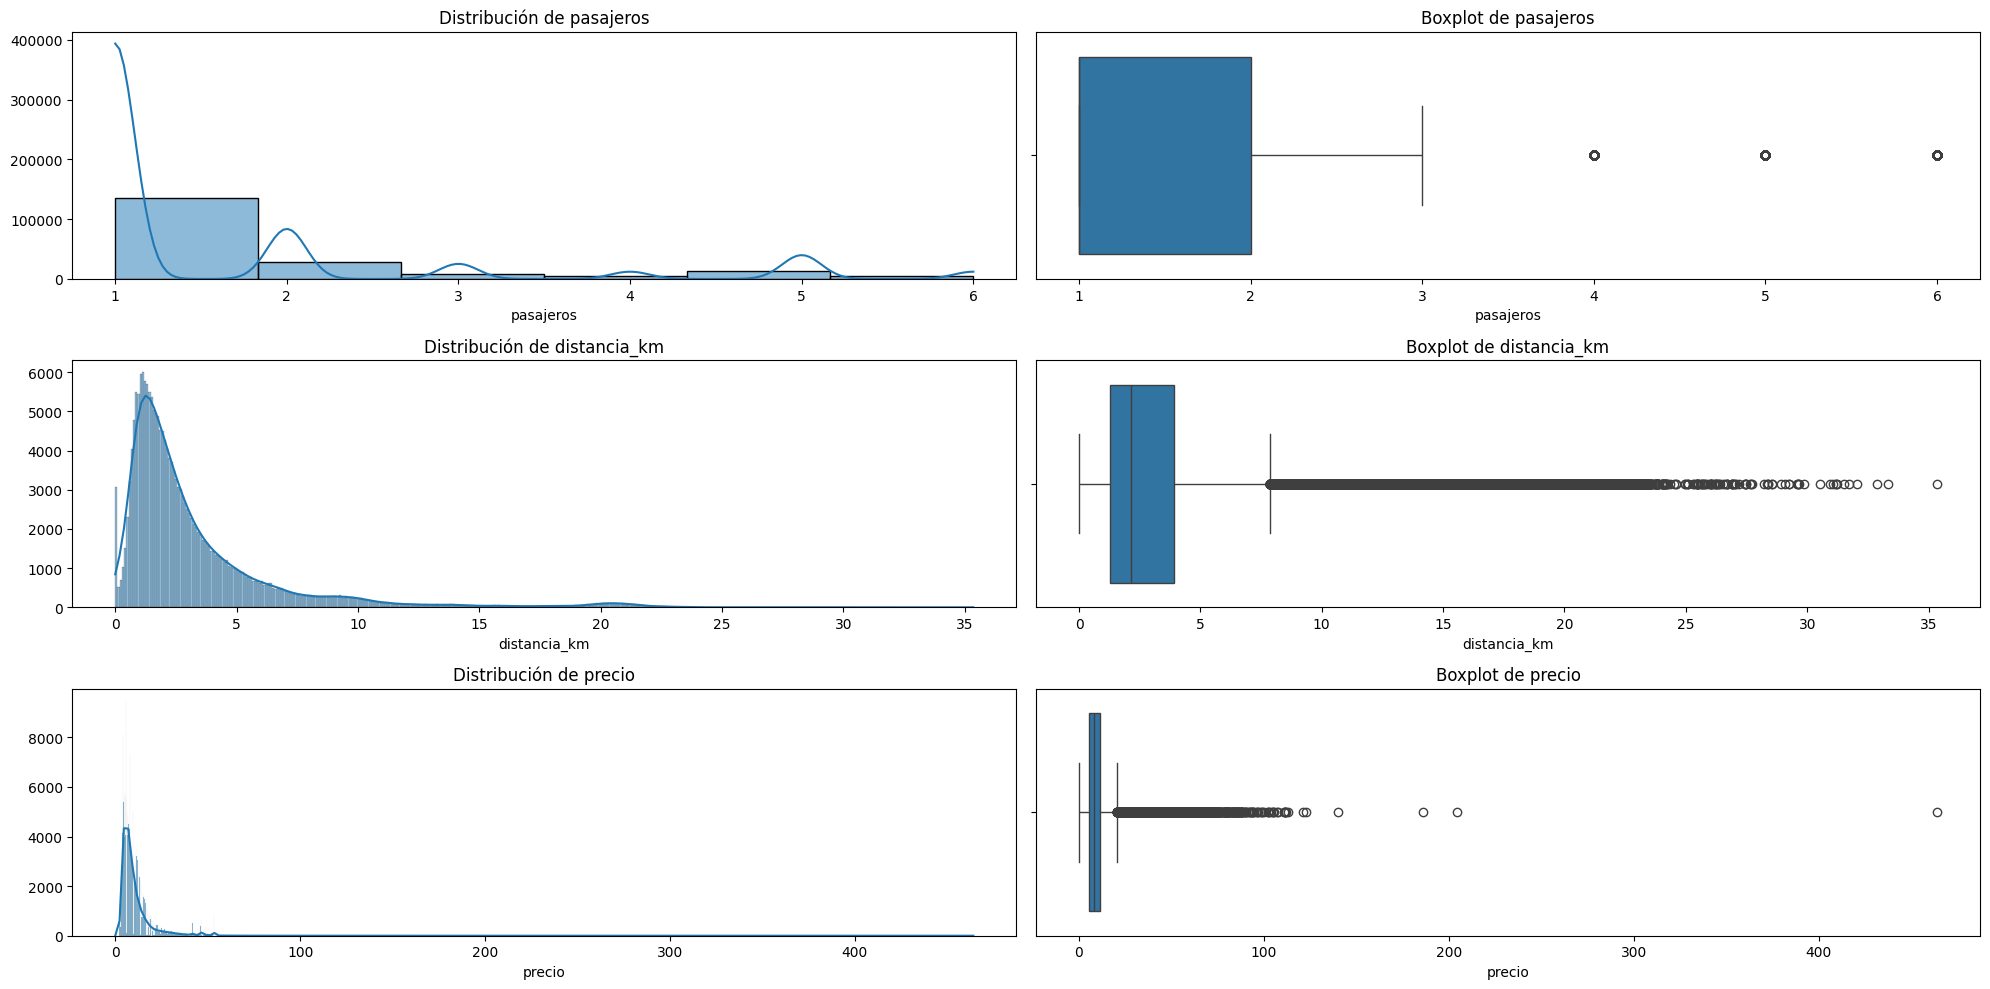

In [38]:
# Veremos cual es la distribución y observar los outlines.

# En el caso de la distribución de pasajeros, es normal, pero su boxplot indica que >3 pasajaros son posibles anomalías

selected_columns = ["pasajeros","distancia_km","precio"]
df_distri = df.loc[:,selected_columns]


plt.figure(figsize=(20, 10))  # Ajusta el tamaño de la figura según sea necesario
for i, col in enumerate(df_distri.columns):
    # Histograma
    plt.subplot(len(df_distri.columns), 2, 2 * i + 1)
    if len(df_distri[col].unique()) <10:
        sns.histplot(df_distri[col], bins=len(df_distri[col].unique()),kde=True)
    else:
        sns.histplot(df_distri[col],kde=True)
    plt.title(f"Distribución de {col}")
    plt.xlabel(col)
    plt.ylabel('')

    # Boxplot
    plt.subplot(len(df_distri.columns), 2, 2 * i + 2)
    sns.boxplot(x=df_distri[col])
    plt.title(f"Boxplot de {col}")
    plt.xlabel(col)
    plt.ylabel('')

plt.tight_layout()
plt.show()

# La distribución de distancias parece normal. Los outliers se diferencian en dos grupos, uno más agrupado y otro más disperso. No estaría claro si sería correcto eliminar TODOS
# los outliers, entonces es mejor analizar los outliers del extremo que son los que potencialmente anomalías




<Axes: xlabel='distancia_km', ylabel='precio'>

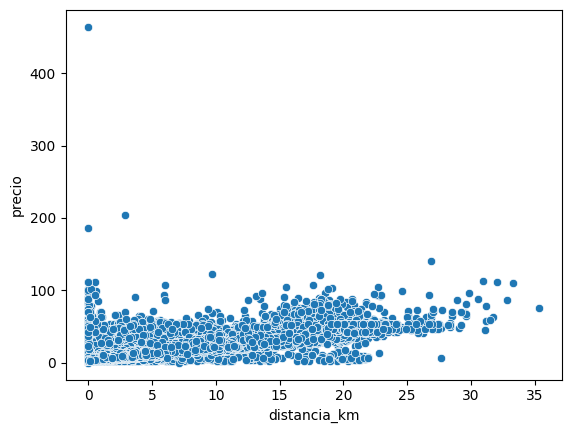

In [39]:

# En el caso de la distribución de precios, vemos que se repite la condición anterior

sns.scatterplot(df , x = "distancia_km" , y = "precio" )

# Para analizar mejor los datos, podemos hacer un segundo análisis de outliners, por ejemplo distancia vs precio, aquí se ve que en el caso de que la variable precio sea muy elevada, la distancia 
# es reducida, por lo que da más seguridad de que sea una anomalía. 

#### Eliminamos las filas y valores anómalos o innecesarios

# Volvemos a comprobar los outliers

In [40]:
# Posible outlier
df[df["precio"]>150]

,Id,recogida_longitud,recogida_latitud,dejada_longitud,dejada_latitud,pasajeros,año,hora,dia,mes,semana,es_finde,es_hora_punta,distancia_km,precio
28534,36:11.0,-73.801147,40.671653,-73.790402,40.646742,1,2013,12,27,9,4,0,0,2.911718,204.60
165654,10:00.0,-73.968377,40.764602,-73.968368,40.764600,1,2011,4,10,4,6,1,0,0.000792,464.07
191550,52:45.0,-73.952994,40.736298,-73.952994,40.736298,1,2010,16,19,8,3,0,1,0.000000,186.00


In [41]:
outliers_precio = list(df[df["precio"]>150].reset_index()["index"])

In [42]:
outliers_distancia = list(df[df["distancia_km"]>= 24].reset_index()["index"])

In [43]:
filas_outliers = set(outliers_precio + outliers_distancia)

In [44]:
df_limpio = df.drop(list(filas_outliers),axis=0).reset_index(drop=True)

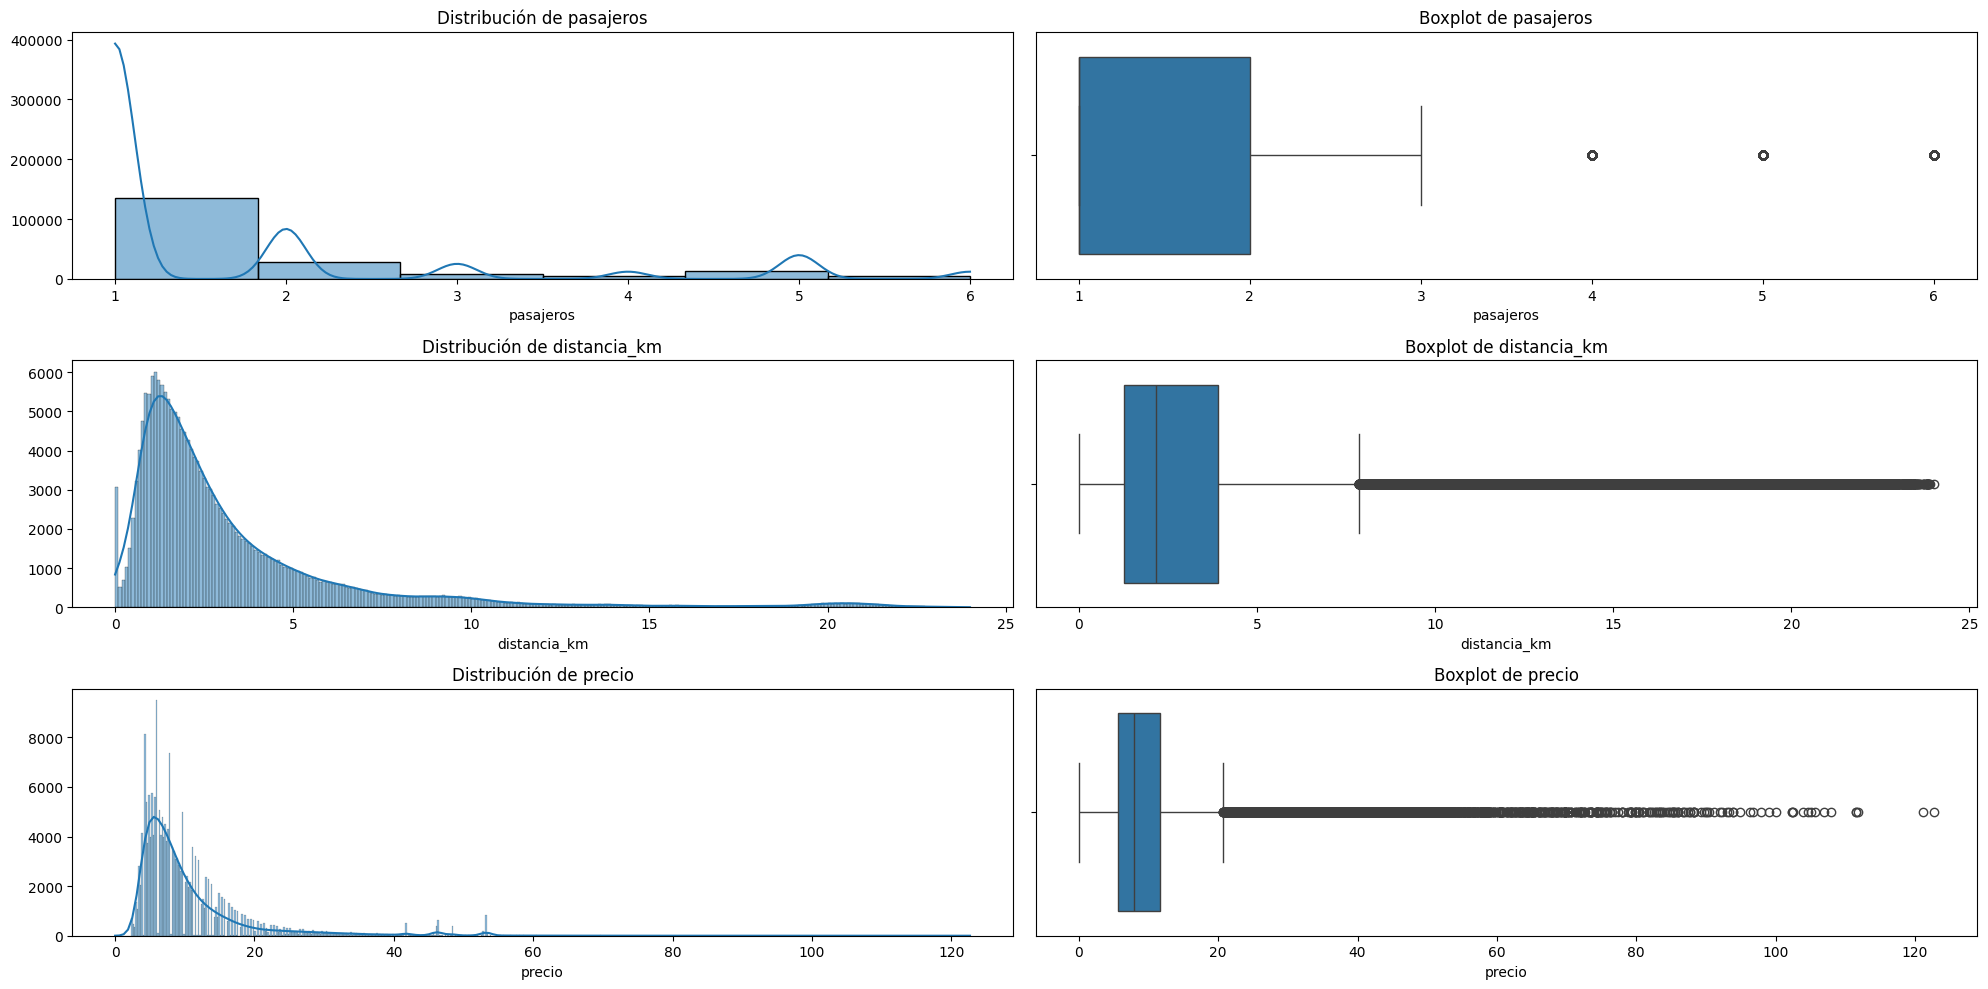

In [45]:
plt.figure(figsize=(20, 10))  # Ajusta el tamaño de la figura según sea necesario
for i, col in enumerate(df_distri.columns):
    # Histograma
    plt.subplot(len(df_distri.columns), 2, 2 * i + 1)
    if len(df_limpio[col].unique()) <10:
        sns.histplot(df_limpio[col], bins=len(df_limpio[col].unique()),kde=True)
    else:
        sns.histplot(df_limpio[col],kde=True)
    plt.title(f"Distribución de {col}")
    plt.xlabel(col)
    plt.ylabel('')

    # Boxplot
    plt.subplot(len(df_distri.columns), 2, 2 * i + 2)
    sns.boxplot(x=df_limpio[col])
    plt.title(f"Boxplot de {col}")
    plt.xlabel(col)
    plt.ylabel('')

plt.tight_layout()
plt.show()

<Axes: xlabel='distancia_km', ylabel='precio'>

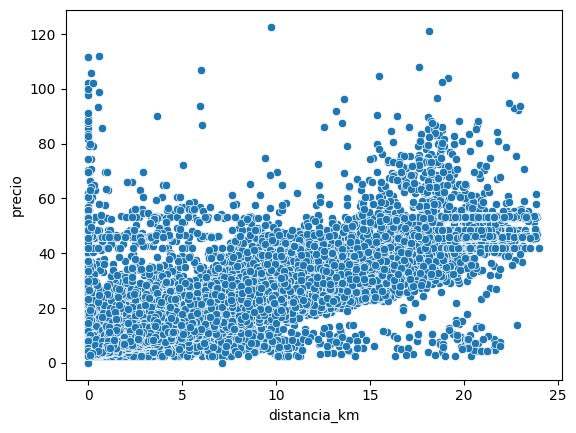

In [46]:
sns.scatterplot(df_limpio , x = "distancia_km" , y = "precio" )

In [47]:
import pandas as pd
import plotly.express as px

# Supongamos que `df` ya contiene el dataset original
# Seleccionar 50 valores aleatorios de cada conjunto (recogida y dejada)
df_recogida = df_limpio[['recogida_longitud', 'recogida_latitud']].rename(
    columns={'recogida_longitud': 'longitud', 'recogida_latitud': 'latitud'}
).sample(n=50, random_state=42)  # Muestra aleatoria de 50 puntos
df_recogida['tipo'] = 'Recogida'

df_dejada = df_limpio[['dejada_longitud', 'dejada_latitud']].rename(
    columns={'dejada_longitud': 'longitud', 'dejada_latitud': 'latitud'}
).sample(n=50, random_state=42)  # Muestra aleatoria de 50 puntos
df_dejada['tipo'] = 'Dejada'

# Combinar ambos DataFrames
df_mapa = pd.concat([df_recogida, df_dejada])

# Crear el mapa
fig = px.scatter_mapbox(
    df_mapa,
    lat="latitud",
    lon="longitud",
    color="tipo",
    zoom=10,
    mapbox_style="carto-positron",
    title="Puntos de Recogida y Dejada (50 valores aleatorios)"
)

# Mostrar el mapa
fig.show()


6. Separamos los datos
----

In [48]:
df_limpio

,Id,recogida_longitud,recogida_latitud,dejada_longitud,dejada_latitud,pasajeros,año,hora,dia,mes,semana,es_finde,es_hora_punta,distancia_km,precio
0,52:06.0,-73.999817,40.738354,-73.999512,40.723217,1,2015,19,7,5,3,0,0,1.681111,6.98
1,04:56.0,-73.994355,40.728225,-73.994710,40.750325,1,2009,20,17,7,4,0,0,2.454363,7.16
2,45:00.0,-74.005043,40.740770,-73.962565,40.772647,1,2009,21,24,8,0,0,0,5.039603,12.00
3,22:21.0,-73.976124,40.790844,-73.965316,40.803349,3,2009,8,26,6,4,0,1,1.661442,4.93
4,47:00.0,-73.925023,40.744085,-73.973082,40.761247,5,2014,17,28,8,3,0,1,4.483730,14.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194709,49:00.0,-73.987042,40.739367,-73.986525,40.740297,1,2012,10,28,10,6,1,0,0.112128,2.79
194710,09:00.0,-73.984722,40.736837,-74.006672,40.739620,1,2014,1,14,3,4,0,0,1.879635,6.98
194711,42:00.0,-73.986017,40.756487,-73.858957,40.692588,2,2009,0,29,6,0,0,0,12.867916,28.74
194712,56:25.0,-73.997124,40.725452,-73.983215,40.695416,1,2015,14,20,5,2,0,0,3.536552,13.49


In [49]:
# Separamos los datos en X e y

# Investiga train_test_split
from sklearn.model_selection import train_test_split

#df_limpio = df_limpio.drop(["id"], axis=1)

X = df_limpio.iloc[:,:-1]
y = df_limpio["precio"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# En la parte de de la Y irá la variable bajo estudio, en este caso el precio
# Los sujetos bajo estudio suele ser un porcentaje entre 1/3 y 1/5 de los datos totales. La variable random_state establece que los datos tomados como testeo y como prueba sean siemrpe los mismos


In [50]:
df

,Id,recogida_longitud,recogida_latitud,dejada_longitud,dejada_latitud,pasajeros,año,hora,dia,mes,semana,es_finde,es_hora_punta,distancia_km,precio
0,52:06.0,-73.999817,40.738354,-73.999512,40.723217,1,2015,19,7,5,3,0,0,1.681111,6.98
1,04:56.0,-73.994355,40.728225,-73.994710,40.750325,1,2009,20,17,7,4,0,0,2.454363,7.16
2,45:00.0,-74.005043,40.740770,-73.962565,40.772647,1,2009,21,24,8,0,0,0,5.039603,12.00
3,22:21.0,-73.976124,40.790844,-73.965316,40.803349,3,2009,8,26,6,4,0,1,1.661442,4.93
4,47:00.0,-73.925023,40.744085,-73.973082,40.761247,5,2014,17,28,8,3,0,1,4.483730,14.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194813,49:00.0,-73.987042,40.739367,-73.986525,40.740297,1,2012,10,28,10,6,1,0,0.112128,2.79
194814,09:00.0,-73.984722,40.736837,-74.006672,40.739620,1,2014,1,14,3,4,0,0,1.879635,6.98
194815,42:00.0,-73.986017,40.756487,-73.858957,40.692588,2,2009,0,29,6,0,0,0,12.867916,28.74
194816,56:25.0,-73.997124,40.725452,-73.983215,40.695416,1,2015,14,20,5,2,0,0,3.536552,13.49


7. Escalamos los datos
----

In [51]:
X_test

,Id,recogida_longitud,recogida_latitud,dejada_longitud,dejada_latitud,pasajeros,año,hora,dia,mes,semana,es_finde,es_hora_punta,distancia_km
71342,48:50.0,-73.946690,40.780926,-73.953390,40.770135,1,2010,19,1,10,4,0,0,1.325114
84827,35:08.0,-73.961253,40.769960,-73.967595,40.763293,1,2014,17,12,3,2,0,1,0.913708
156132,35:00.0,-73.987483,40.752723,-73.940525,40.793397,2,2010,18,26,6,5,1,1,6.009803
144886,51:00.0,-73.932342,40.764650,-73.870300,40.772837,1,2013,9,23,2,5,1,1,5.316431
186568,33:00.0,-73.962123,40.779245,-73.969675,40.759323,5,2010,15,1,12,2,0,0,2.302374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160225,47:00.0,-73.985545,40.722865,-73.990890,40.725970,1,2011,14,4,8,3,0,0,0.568161
63273,21:00.0,-74.000032,40.730453,-73.985455,40.754978,5,2012,23,24,2,4,0,0,2.988839
9526,30:00.0,-73.947078,40.775930,-73.952327,40.781168,5,2012,16,3,4,1,0,1,0.731223
152496,52:56.0,-74.004316,40.737941,-73.994415,40.745926,2,2011,23,23,9,4,0,0,1.218859


In [52]:
# Utilziamos el método StandarScaler, investiga

# SOLAMENTE se escala la X, la y nunca se escala

# Tenemos el escalador, un modelo ya hecho y que tomamos de una libreria : scaler
# Sobre la parte de entreno de X (X_train_scaled) entrena y escala este conjunto de datos con "scaler.fit_transform(X_train)"
# 

from sklearn.preprocessing import MinMaxScaler , StandardScaler

scaler = StandardScaler()
X_train = X_train.drop(columns=["Id"])
X_test = X_test.drop(columns=["Id"])
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


8. Modelado
----

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Dividir en características (X) y variable objetivo (y)
X = df.drop(columns=['precio'])
y = df['precio']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Eliminar 'Id' si existe
X_train = X_train.drop(columns=["Id"], errors='ignore')
X_test = X_test.drop(columns=["Id"], errors='ignore')

# Manejar valores nulos
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_train.mean())

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear y ajustar el modelo
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predecir los precios en el conjunto de prueba
y_pred = model.predict(X_test_scaled)

# Comparar predicciones con valores reales
print("Predicciones:", y_pred[:10])
print("Valores reales:", y_test.iloc[:10].values)



Predicciones: [14.03372408 21.61674735  5.27662894 14.85102424  6.13958237 24.21445809
  8.78397942  7.68264064 27.82566848  7.08305156]
Valores reales: [14.88 15.72  4.93 10.88  6.98 23.71  7.16  7.91 24.27  6.51]


In [54]:
print(y_test[:10])  # Imprime los primeros 10 valores reales


83437     14.88
169667    15.72
156415     4.93
148818    10.88
55281      6.98
188612    23.71
21648      7.16
163964     7.91
131268    24.27
96790      6.51
Name: precio, dtype: float64


MSE (Mean Squared Error): Un valor bajo indica que el modelo comete pequeños errores.

MAE (Mean Absolute Error): Muestra el error promedio absoluto entre las predicciones y los valores reales.

R2  (R-squared): Evalúa qué porcentaje de la variabilidad en el precio de Uber es explicada por el modelo. Un valor cercano a 1 es ideal.

In [55]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calcular métricas
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R^2): {r2}")

Mean Squared Error (MSE): 17.030731639378246
Mean Absolute Error (MAE): 2.0911378449213847
R-squared (R^2): 0.7771254104201596


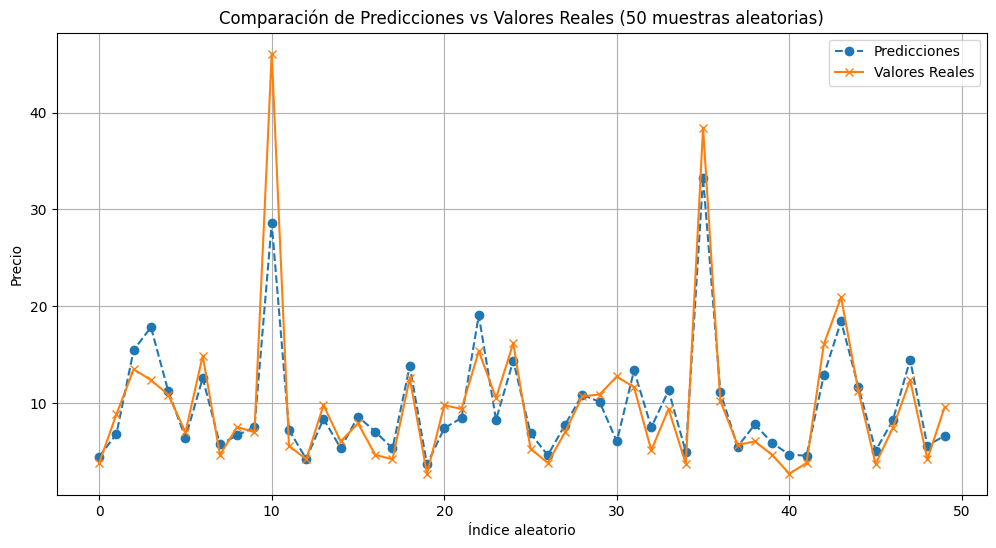

In [58]:
import matplotlib.pyplot as plt
import numpy as np

# Seleccionar índices aleatorios
num_predicciones = 50  # Número de predicciones a comparar
indices_aleatorios = np.random.choice(range(len(X_test_scaled)), num_predicciones, replace=False)

# Obtener las predicciones y los valores reales para los índices aleatorios
y_pred_aleatorias = model.predict(X_test_scaled[indices_aleatorios])
y_real_aleatorias = y_test.iloc[indices_aleatorios].values

# Crear la gráfica
plt.figure(figsize=(12, 6))
plt.plot(range(num_predicciones), y_pred_aleatorias, label="Predicciones", marker="o", linestyle="--")
plt.plot(range(num_predicciones), y_real_aleatorias, label="Valores Reales", marker="x", linestyle="-")
plt.title("Comparación de Predicciones vs Valores Reales (50 muestras aleatorias)")
plt.xlabel("Índice aleatorio")
plt.ylabel("Precio")
plt.legend()
plt.grid(True)
plt.show()

